# Q1 

### The code to generate a noisy point set X amounting to a circle

In [18]:

import numpy as np
from scipy  import optimize
from scipy import linalg
import matplotlib.pyplot as plt
import cv2 as cv
# np . random . seed ( 0 )
N = 100
half_n = N//2
r = 10
s = r / 16
t = np.random.uniform( 0 , 2*np.pi , half_n )
n = s *np.random.randn( half_n )
x , y = ( r + n ) * np.cos(t) , ( r + n ) * np.sin( t )
X_circ = np.hstack( ( x.reshape( half_n ,1),y.reshape ( half_n , 1 ) ) )
m, b = -1, 2
x = np.linspace( -12 , 12 , half_n )
y = m*x + b + s *np.random.randn( half_n )
X_line = np.hstack ( ( x.reshape ( half_n , 1 ) , y.reshape ( half_n , 1 ) ) )
X = np.vstack ( ( X_circ , X_line ) )



print(X.shape)


(100, 2)


In [19]:
#RANSAC line finder - not asked in the assignment

thres =0.7
randomSamplingCount = 1000
pointSet1_indexes = np.random.randint(0,len(X),(randomSamplingCount))
pointSet2_indexes = np.random.randint(0,len(X),(randomSamplingCount)) 

#points can be equal -- fix it later ---------------*

xi = np.zeros(randomSamplingCount)
yi =np.zeros(randomSamplingCount)
xj =np.zeros(randomSamplingCount)
yj =np.zeros(randomSamplingCount)

for i in range(randomSamplingCount):
    xi[i] = X[pointSet1_indexes[i]][0]
    yi[i] = X[pointSet1_indexes[i]][1]
    
    xj[i] = X[pointSet2_indexes[i]][0]
    yj[i] = X[pointSet2_indexes[i]][1]
    

mSet = (yi-yj)/(xi-xj)
cSet = (xj*yi-xi*yj)/(xj-xi)
countSet = np.zeros(len(mSet))

for i in range(len(mSet)):
    m = mSet[i]
    c = cSet[i]
    dSet = abs(-X[:,1]+m*X[:,0]+c)/np.sqrt(1+m**2)
    close = dSet<thres
    count = np.sum(close)
    countSet[i] = count
    

mostMatchingIndex = np.argmax(countSet)
mBest = mSet[mostMatchingIndex]
cBest = cSet[mostMatchingIndex]
print("The equation of the line detected")
print("y =  mx + c ")
print("y=({})x+({})".format(mBest,cBest))

The equation of the line detected
y =  mx + c 
y=(-0.9710846074235088)x+(1.9624568274633314)


C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_12792/1554511757.py:23: RuntimeWarning: invalid value encountered in true_divide
  mSet = (yi-yj)/(xi-xj)
C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_12792/1554511757.py:24: RuntimeWarning: invalid value encountered in true_divide
  cSet = (xj*yi-xi*yj)/(xj-xi)


for best fitting using the code from: https://scipy-cookbook.readthedocs.io/items/Least_Squares_Circle.html#Using-scipy.optimize.leastsq

debug x1 shape (10000,)
debug xoSet shape (10000,)


C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_12792/1777196842.py:39: RuntimeWarning: invalid value encountered in true_divide
  x0Set = (B2*C3-B3*C2)/(B3*A2-B2*A3)
C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_12792/1777196842.py:40: RuntimeWarning: invalid value encountered in true_divide
  y0Set = (A2*C3-A3*C2)/(A3*B2-A2*B3)


debug countSet shape (10000,)
4116
equation of the circle detected
(x-x0)**2 + (y-y0)**2 = r**2
(x - (0.19415959357917711))**2 + (y - (-0.7380666592199007))**2 = 10.087664466064997**2
len(X_inliers_y) 65
bestFitCircle [0.0993500163024312, -0.2514603818290916, 10.019369332652058]


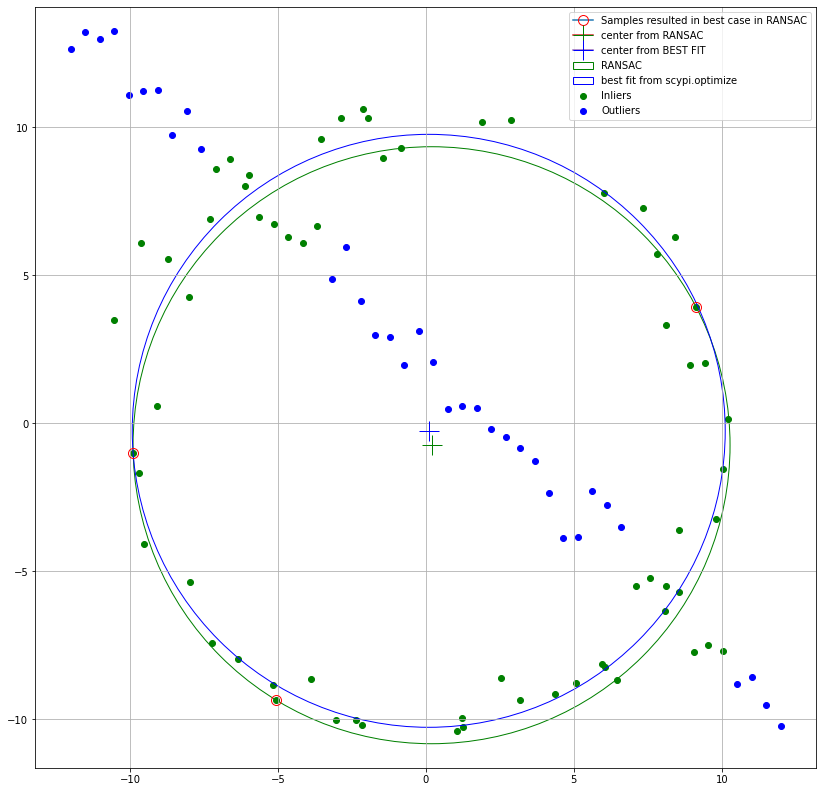

In [20]:
#RANSAC circle finder



#RANSAC
thres = 2
randomSamplingCount = 10000 #100000
# three sets of random points are selected from the given point set 
#each time , one from each 3 groups will be selected (in the order) as the 3 points for candidate circle
pointSet1_indexes = np.random.randint(0,len(X),(randomSamplingCount))
pointSet2_indexes = np.random.randint(0,len(X),(randomSamplingCount)) 
pointSet3_indexes = np.random.randint(0,len(X),(randomSamplingCount)) 
#points can be non-distinct -- fix it later ---------------------------------------------------------------------*

x1 = np.zeros(randomSamplingCount)
y1 =np.zeros(randomSamplingCount)
x2 =np.zeros(randomSamplingCount)
y2 =np.zeros(randomSamplingCount)
x3 =np.zeros(randomSamplingCount)
y3 =np.zeros(randomSamplingCount)
for i in range(randomSamplingCount):
    x1[i] = X[pointSet1_indexes[i]][0]
    y1[i] = X[pointSet1_indexes[i]][1]    
    x2[i] = X[pointSet2_indexes[i]][0]
    y2[i] = X[pointSet2_indexes[i]][1]   
    x3[i] = X[pointSet3_indexes[i]][0]
    y3[i] = X[pointSet3_indexes[i]][1]    

print("debug x1 shape",x1.shape)
    
#These variables are needed to calculate the cerntre coords and the radii of circles list :: shown in the rough work paper
A2 = -2*(x1-x2)
B2 = -2*(y1-y2)
C2 = x1**2-x2**2+y1**2-y2**2
A3 = -2*(x1-x3)
B3 = -2*(y1-y3)
C3 = x1**2-x3**2+y1**2-y3**2

x0Set = (B2*C3-B3*C2)/(B3*A2-B2*A3)
y0Set = (A2*C3-A3*C2)/(A3*B2-A2*B3)
rSet = np.sqrt((x1-x0Set)**2 + (y1-y0Set)**2)  
countSet = np.zeros(len(x0Set))

print("debug xoSet shape",x0Set.shape)
#counting the inliers 
for i in range(len(x0Set)):
    x0 = x0Set[i]
    y0 = y0Set[i]
    r = rSet[i]
    x = X[:,0]
    y = X[:,1]
    dSet = abs(np.sqrt((x-x0)**2+(y-y0)**2)-r) #distances from the candidate circle
    close  = dSet < thres
    count = np.sum(close)
    countSet[i] = count
    
mostMatchingIndex = np.argmax(countSet)
x0Best = x0Set[mostMatchingIndex]
y0Best = y0Set[mostMatchingIndex]
rBest = rSet[mostMatchingIndex]
print("debug countSet shape",countSet.shape)
print(mostMatchingIndex)

print("equation of the circle detected")
print("(x-x0)**2 + (y-y0)**2 = r**2")
print("(x - ({}))**2 + (y - ({}))**2 = {}**2".format(x0Best,y0Best,rBest))


#get the inliers to find the best fit circle
x = X[:,0]
y = X[:,1]
dSet = abs(np.sqrt((x-x0Best)**2+(y-y0Best)**2)-rBest) #distances from the candidate circle
close  = dSet < thres
X_inliers_x = np.zeros(np.sum(close))
X_inliers_y = np.zeros(np.sum(close))
X_outliers_x = np.zeros(len(X) - np.sum(close))
X_outliers_y = np.zeros(len(X)  - np.sum(close))

countInliersAdded =0
countOutliersAdded =0
for i in range(len(X)):
    if close[i]:
        X_inliers_x[countInliersAdded] = X[i][0]
        X_inliers_y[countInliersAdded] = X[i][1]
        countInliersAdded+=1
    else:
        X_outliers_x[countOutliersAdded] = X[i][0]
        X_outliers_y[countOutliersAdded] = X[i][1]
        countOutliersAdded+=1
print("len(X_inliers_y)",len(X_inliers_y))


def bestFitCircleFinder(x,y):

    x_m = np.mean(x)
    y_m = np.mean(y)

    def calc_R(xc, yc):
        #calculate the distance of each 2D points from the center (xc, yc)
        return np.sqrt((x-xc)**2 + (y-yc)**2)

    def f_2(c):
        # calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc)
        Ri = calc_R(*c)
        return Ri - np.mean(Ri)

    center_estimate = x_m, y_m
    center_2, ier = optimize.leastsq(f_2, center_estimate)

    xc, yc = center_2
    Ri         = calc_R(*center_2)
    R        = np.mean(Ri)

    return ([xc,yc,R])

bestFitCircle = bestFitCircleFinder(X_inliers_x,X_inliers_y)
print("bestFitCircle",bestFitCircle)


#getting the three sample points resulted in the best match in RANSAC
xSample1 , ySample1 =  x1[mostMatchingIndex],y1[mostMatchingIndex]
xSample2 , ySample2 =  x2[mostMatchingIndex],y2[mostMatchingIndex]
xSample3 , ySample3 =  x3[mostMatchingIndex],y3[mostMatchingIndex]

fig,ax = plt.subplots(1,figsize=(14,14))
plt.xlim(-10, 10)
plt.ylim(-10, 10)
ax.axis('equal')
ax.grid()

#plotting the inliers
plt.scatter(X_inliers_x,X_inliers_y,marker="o", color= 'green', label = 'Inliers')
#plotting the outliers
plt.scatter(X_outliers_x,X_outliers_y,marker="o", color= 'blue', label = 'Outliers')
    
    
circleRANSAC = plt.Circle((x0Best, y0Best), rBest,color=None, edgecolor='g', clip_on=False,fill=0,label="RANSAC")
circleBestFit = plt.Circle((bestFitCircle[0], bestFitCircle[1]), bestFitCircle[2],color=None, edgecolor='b', clip_on=False,fill=0,label="best fit from scypi.optimize")

#best three samples :: they will be overwritten in a different style
ax.plot(xSample1, ySample1, marker=".", markersize=20, markeredgecolor="red", markerfacecolor="none",label="Samples resulted in best case in RANSAC")
ax.plot(xSample2, ySample2, marker=".", markersize=20, markeredgecolor="red", markerfacecolor="none")
ax.plot(xSample3, ySample3, marker=".", markersize=20, markeredgecolor="red", markerfacecolor="none")

#centeres of best fit and the RANSAC
ax.plot([x0Best],[y0Best], marker="+", markersize=20, markeredgecolor="green", markerfacecolor="none",label="center from RANSAC")
ax.plot([bestFitCircle[0]],[bestFitCircle[1]], marker="+", markersize=20, markeredgecolor="blue", markerfacecolor="none",label="center from BEST FIT")


ax.add_patch(circleRANSAC)
ax.add_patch(circleBestFit)
plt.legend()
plt.show()

# Q2

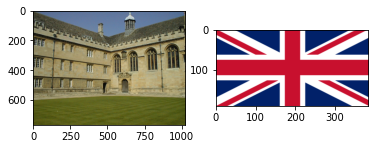

In [27]:
wadham = r"D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/~images/ass2/wadham/001.jpg"
flag = r"D:/ENTC/SEM_4/EN2550 - Fundamentals of Image Processing and Machine Vision/~images/ass2/Flag_of_the_United_Kingdom.svg.png"


imgWadham = cv.cvtColor(cv.imread(wadham,1),cv.COLOR_BGR2RGB)
imgFlag = cv.cvtColor(cv.imread(flag,1),cv.COLOR_BGR2RGB)


fig, ax = plt.subplots(1,2)
ax[0].imshow(imgWadham)
ax[1].imshow(imgFlag)




[[[ 9.79112272e-01]
  [-6.77083333e-02]
  [ 1.46000000e+02]]

 [[ 2.21932115e-01]
  [ 1.65104167e+00]
  [ 2.05000000e+02]]

 [[ 1.00000000e-05]
  [-2.00000000e-03]
  [ 1.11100000e+00]]]


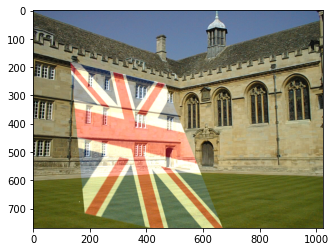

In [61]:
X2 = np.array([[146],
              [133],
              [521]])
Y2 = np.array([[205],
              [522],
              [290]])
Ones2 = np.array([[1],
                 [1],
                 [1]])
M1 = np.array([[0,0,1],
              [0,192,1],
              [383,0,1]])

M1_inv = np.linalg.inv(M1)

Hr1 = M1_inv @ X2
Hr2 = M1_inv @ Y2
Hr3 = M1_inv @ Ones2

H = np.array([Hr1,Hr2,Hr3])
H[2,0] = 0.00001
H[2,1] = -0.002
H[2,2] = 1.111
print(H)


w=1024
h=768

warped = cv.warpPerspective(imgFlag, H, (w, h))

# plt.imshow(warped)
# plt.show()

# plt.imshow(imgWadham)
# plt.show()


superImposed = cv.addWeighted(imgWadham,1,warped,0.5,1)


plt.imshow(superImposed)
plt.show()

In [83]:
# to find the hormography need 4 points which we know their transformation destination
X1 = np.array([[0,0,1],
     [0,192,1],
     [383,0,1],
     [383,192,1]]).T



X2 = np.array([[146,205,1],
     [133,522,1],
     [521,290,1],
     [552,519,1]]).T

span = np.linspace(-2,2,5)
errorMin = -1
errorMinH = -1
for h11 in span:
    for h12 in span:
        for h13 in span:
            for h21 in span:
                for h22 in span:
                    for h23 in span:
                        for h31 in span:
                            for h32 in span:
                                for h33 in span:
                                    H = np.array([[h11,h12,h13],
                                                [h21,h22,h23],
                                                [h31,h32,h33]])
                                    X2_calc = H @ X1
#                                     print("X1 = ",X1)
#                                     print("H = ", H)
#                                     print("X2_calc = " , X2_calc)
                                    
                                    X2_calc_scaled = np.hstack((                       
                                                                (X2_calc[:,0]/X2_calc[2,0]).reshape((3,1)), 
                                                                (X2_calc[:,1]/X2_calc[2,1]).reshape((3,1)), 
                                                                (X2_calc[:,2]/X2_calc[2,2]).reshape((3,1)),
                                                                (X2_calc[:,3]/X2_calc[2,3]).reshape((3,1))
                                        ))
#                                     print("X2_calc_scaled = " , X2_calc_scaled)
                                    error = np.linalg.norm(X2 - X2_calc_scaled)
#                                     print("error",error)
                                    if errorMin==-1 or errorMin > error:
                                        errorMin=error
                                        errorMinH = H

                                        
                                    
            










C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_12792/233895234.py:35: RuntimeWarning: divide by zero encountered in true_divide
  (X2_calc[:,0]/X2_calc[2,0]).reshape((3,1)),
C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_12792/233895234.py:35: RuntimeWarning: invalid value encountered in true_divide
  (X2_calc[:,0]/X2_calc[2,0]).reshape((3,1)),
C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_12792/233895234.py:36: RuntimeWarning: divide by zero encountered in true_divide
  (X2_calc[:,1]/X2_calc[2,1]).reshape((3,1)),
C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_12792/233895234.py:36: RuntimeWarning: invalid value encountered in true_divide
  (X2_calc[:,1]/X2_calc[2,1]).reshape((3,1)),
C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_12792/233895234.py:38: RuntimeWarning: divide by zero encountered in true_divide
  (X2_calc[:,3]/X2_calc[2,3]).reshape((3,1))
C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_12792/233895234.py:38: RuntimeWarning: invalid value encountered in true_divide
  (X2_calc[:,3]/X2

In [81]:
errorMin

1129.4447938768958

## with openCV functions

In [ ]:
X1 = np.array([[0,0,1],
     [0,192,1],
     [383,0,1],
     [383,192,1]]).T



X2 = np.array([[146,205,1],
     [133,522,1],
     [521,290,1],
     [552,519,1]]).T